In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df=pd.read_csv(r"C:\Users\sripa\OneDrive\Desktop\income.csv")
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [2]:

x_scaled = MinMaxScaler().fit_transform(df[['Age', 'Income']]) 
print(x_scaled)

[[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]
 [0.76470588 0.94017094]
 [0.88235294 0.98290598]
 [0.70588235 1.        ]
 [0.58823529 0.94871795]
 [0.52941176 0.72649573]
 [0.64705882 0.78632479]
 [0.         0.        ]
 [0.05882353 0.02564103]
 [0.11764706 0.05128205]
 [0.17647059 0.03846154]
 [0.35294118 0.06837607]
 [0.82352941 0.17094017]
 [0.88235294 0.15384615]
 [1.         0.16239316]
 [0.76470588 0.2991453 ]
 [0.88235294 0.31623932]
 [0.76470588 0.11111111]]


C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

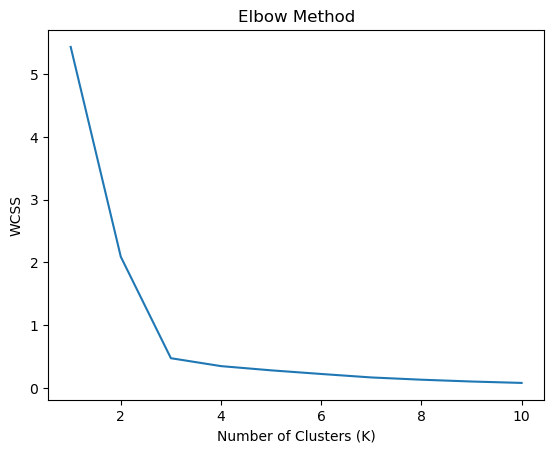

C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sripa\AppData\Local\Temp\ipykernel_17892\3503256802.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


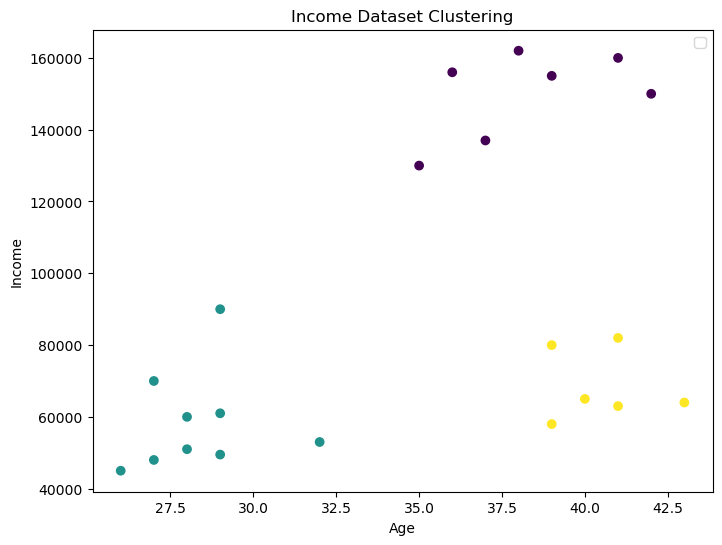

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_pred= kmeans.fit_predict(x_scaled)
df['cluster'] = y_pred

print(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=df['cluster'])
plt.title('Income Dataset Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()